In [1]:
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt

In [2]:
experiments = []

In [3]:

algorithms = ['opposd', 'offpac']
for alg in algorithms:
    return_dict = {}
    my_data = None
    for number in range (1,6):
        file_data = genfromtxt("experiments_results/runningenv_%s_%d.csv"%(alg, number), delimiter=',')
        if my_data is None:
            my_data = [file_data]
        else:
            my_data = np.append(my_data, [file_data], axis=0)
    algorithm = 'OFFPAC'
    if alg == 'offpac':
        algorithm = 'OPPOSD'

    return_dict.update({'algorithm' : algorithm,
                        'mean': np.mean(my_data, axis=0),
                        'std': np.std(my_data, axis=0)})
    experiments = np.append(experiments, return_dict)

In [4]:
import gym
env = gym.make('CartPole-v0')
cart_pole_rewards = []
for i in range(500):
    env.reset()
    reward = 0
    d = False
    while not d:
        a = np.random.randint(0,2)
        _, r, d, _ = env.step(a)
        reward += r
    cart_pole_rewards = np.append(cart_pole_rewards, reward)


/home/juanes/Documents/THESIS/OPPOSD_algorithm/venv/lib/python3.8/site-packages/gym/envs/registration.py:505: UserWarning: WARN: The environment CartPole-v0 is out of date. You should consider upgrading to version `v1` with the environment ID `CartPole-v1`.
  logger.warn(


In [7]:
def plot_data(avg_behavior, experiments=experiments):
    plt.figure(figsize=(8, 6), dpi=80)
    i = 0

    for exp in experiments:
        window = max(int(len(exp['mean']) / 30), 1)
        # if len(exp.episode_losses) < window + 2: return
        returns = np.convolve(exp['mean'], np.ones(window) / window, 'valid')
        errors = np.convolve(exp['std'], np.ones(window) / window, 'valid')
        # Determine x-axis based on samples or episodes
        x_returns = [i + window for i in range(len(returns))]
        plt.plot(x_returns, returns, label='%s'%(exp['algorithm']))
        plt.fill_between(x_returns, returns-(errors), returns+(errors),alpha=0.2)
    plt.axhline(y=np.mean(cart_pole_rewards), color='k', linestyle='--', label='Random behavior')
    plt.xlabel('Policy gradient step')
    plt.ylabel('Episode return')
    # plt.legend(['OFFPAC', 'PPO Learner', 'Random behavior'])
    plt.legend()
    plt.title('cart-pole environment')
    plt.savefig("generated_graphs/cartpole_comp_1.pdf")

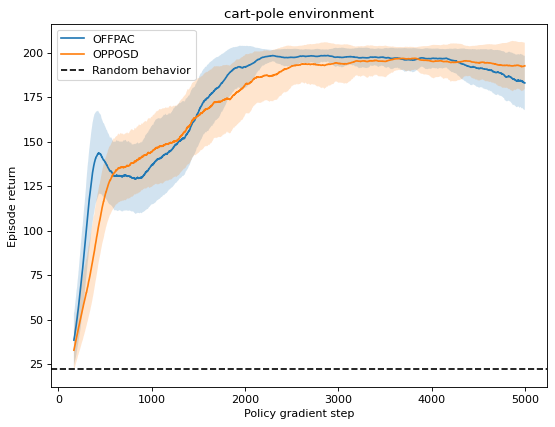

In [8]:
plot_data(experiments)